In [89]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
diabetes=pd.read_csv('diabetes.csv')

In [91]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [92]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [93]:
cols_to_norm = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [94]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))

In [95]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [96]:
num_preg = tf.feature_column.numeric_column('Pregnancies')
plasma_gluc = tf.feature_column.numeric_column('Glucose')
dias_press = tf.feature_column.numeric_column('BloodPressure')
tricep = tf.feature_column.numeric_column('SkinThickness')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('DiabetesPedigreeFunction')
age=tf.feature_column.numeric_column('Age')


In [97]:

assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [98]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

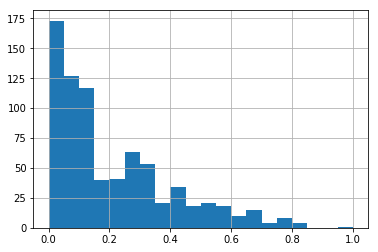

In [99]:
diabetes['Age'].hist(bins=20)

In [100]:
#converting Age into category
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [101]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [102]:
# TRAIN TEST SPLIT

x_data=diabetes.drop("Outcome",axis=1)

In [103]:
labels = diabetes['Outcome']

In [104]:
from sklearn.model_selection import  train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [106]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,
                                                num_epochs=1000,shuffle=True)

In [107]:
model=tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\winuser\\AppData\\Local\\Temp\\tmpgpz6t_gf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000000F1C8828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [108]:
model.train(input_fn=input_func,steps=1000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\winuser\AppData\Local\Temp\tmpgpz6t_gf\model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 317.46
INFO:tensorflow:loss = 5.2414985, step = 101 (0.319 sec)
INFO:tensorflow:global_step/sec: 543.478
INFO:tensorflow:loss = 6.231243, step = 201 (0.181 sec)
INFO:tensorflow:global_step/sec: 694.444
INFO:tensorflow:loss = 5.3586717, step = 301 (0.147 sec)
INFO:tensorflow:global_step/sec: 675.676
INFO:tensorflow:loss = 5.2245455, step = 401 (0.146 sec)
INFO:tensorflow:global_step/sec: 609.756
INFO:tensorflow:loss = 5.7622356, step = 501 (0.164 sec)
INFO:tensorflow:global_step/sec: 602.41
INFO:tensorflow:loss = 5.278362, step = 601 (0.167 sec)
INFO:tensorflow:global_step/sec

In [109]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,
                                                     num_epochs=1,
                                                     shuffle=False)

In [110]:
result=model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-22-12:14:43
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\winuser\AppData\Local\Temp\tmpgpz6t_gf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-22-12:14:43
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.8113169, auc_precision_recall = 0.67339736, average_loss = 0.5457823, global_step = 1000, label/mean = 0.35064936, loss = 5.253155, precision = 0.7291667, prediction/mean = 0.377926, recall = 0.43209878
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\winuser\AppData\Local\Temp\tmpgpz6t_gf\model.ckpt-1000


In [111]:
result

{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8113169,
 'auc_precision_recall': 0.67339736,
 'average_loss': 0.5457823,
 'label/mean': 0.35064936,
 'loss': 5.253155,
 'precision': 0.7291667,
 'prediction/mean': 0.377926,
 'recall': 0.43209878,
 'global_step': 1000}

In [112]:
pred_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10,
                                                   num_epochs=1,shuffle=False)

In [113]:
predictions=model.predict(pred_input_func)

In [114]:
pred=list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\winuser\AppData\Local\Temp\tmpgpz6t_gf\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [115]:
pred

[{'logits': array([-0.9347409], dtype=float32),
  'logistic': array([0.28196388], dtype=float32),
  'probabilities': array([0.7180361 , 0.28196388], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([0.14767158], dtype=float32),
  'logistic': array([0.5368509], dtype=float32),
  'probabilities': array([0.46314904, 0.5368509 ], dtype=float32),
  'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.8056948], dtype=float32),
  'logistic': array([0.30880865], dtype=float32),
  'probabilities': array([0.6911914 , 0.30880868], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.5745245], dtype=float32),
  'logistic': array([0.3601935], dtype=float32),
  'probabilities': array([0.6398065 , 0.36019346], dtype=float32),
  'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object)},
 {'logits'

In [120]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,20,20,20,10],feature_columns=feat_cols,
                                      n_classes=2)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\winuser\\AppData\\Local\\Temp\\tmptinnbnx5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000000131942E8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [121]:
dnn_model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\winuser\AppData\Local\Temp\tmptinnbnx5\model.ckpt.
INFO:tensorflow:loss = 6.8181868, step = 1
INFO:tensorflow:global_step/sec: 330.033
INFO:tensorflow:loss = 7.3832784, step = 101 (0.314 sec)
INFO:tensorflow:global_step/sec: 485.437
INFO:tensorflow:loss = 4.8998013, step = 201 (0.202 sec)
INFO:tensorflow:global_step/sec: 520.834
INFO:tensorflow:loss = 3.9968073, step = 301 (0.188 sec)
INFO:tensorflow:global_step/sec: 460.829
INFO:tensorflow:loss = 6.57789, step = 401 (0.215 sec)
INFO:tensorflow:global_step/sec: 523.56
INFO:tensorflow:loss = 2.9509506, step = 501 (0.192 sec)
INFO:tensorflow:global_step/sec: 529.1
INFO:tensorflow:loss = 6.1466904, step = 601 (0.190 sec)
INFO:tensorflow:global_step/sec

In [122]:
eval_input_func=tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [123]:
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-08-22-12:19:34
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\winuser\AppData\Local\Temp\tmptinnbnx5\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-08-22-12:19:35
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74458873, accuracy_baseline = 0.64935064, auc = 0.8422222, auc_precision_recall = 0.764509, average_loss = 0.4704324, global_step = 1000, label/mean = 0.35064936, loss = 4.5279117, precision = 0.63095236, prediction/mean = 0.38656628, recall = 0.654321
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\winuser\AppData\Local\Temp\tmptinnbnx5\model.ckpt-1000


{'accuracy': 0.74458873,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8422222,
 'auc_precision_recall': 0.764509,
 'average_loss': 0.4704324,
 'label/mean': 0.35064936,
 'loss': 4.5279117,
 'precision': 0.63095236,
 'prediction/mean': 0.38656628,
 'recall': 0.654321,
 'global_step': 1000}